In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [50]:
iris = load_iris()

In [51]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [52]:
df['Species'] = iris.target


In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
df = df[df['Species'] != 0][['sepal width (cm)','petal length (cm)','Species']]


In [55]:
df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

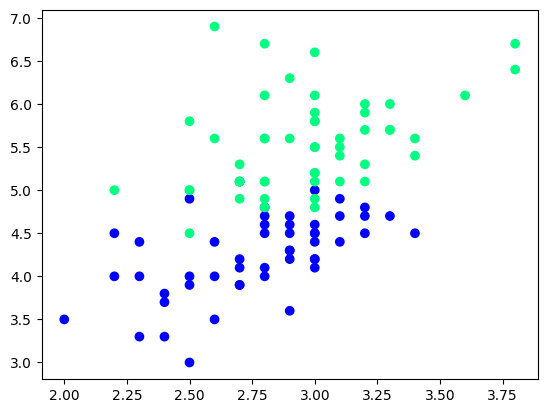

In [57]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['Species'],cmap='winter')


In [58]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),Species
103,2.9,5.6,2
52,3.1,4.9,1
102,3.0,5.9,2
87,2.3,4.4,1
97,2.9,4.3,1
54,2.8,4.6,1
78,2.9,4.5,1
108,2.5,5.8,2
56,3.3,4.7,1
51,3.2,4.5,1


In [59]:
# taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [60]:
df_train

,sepal width (cm),petal length (cm),Species
75,3.0,4.4,1
59,2.7,3.9,1
142,2.7,5.1,2
145,3.0,5.2,2
139,3.1,5.4,2
77,3.0,5.0,1
95,3.0,4.2,1
82,2.7,3.9,1
126,2.8,4.8,2
66,3.0,4.5,1


In [61]:
df_val

,sepal width (cm),petal length (cm),Species
103,2.9,5.6,2
85,3.4,4.5,1
149,3.0,5.1,2
60,2.0,3.5,1
109,3.6,6.1,2


In [62]:
X_test = df_val.iloc[:,1:2].values
y_test = df_val.iloc[:,-1].values

In [63]:
y_test

array([2, 1, 2, 1, 2])

# Case 01 - Bagging

In [64]:
# Data for tree 
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),Species
145,3.0,5.2,2
77,3.0,5.0,1
139,3.1,5.4,2
77,3.0,5.0,1
139,3.1,5.4,2
77,3.0,5.0,1
75,3.0,4.4,1
145,3.0,5.2,2


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_bag1 = DecisionTreeClassifier()

In [67]:
def evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    plot_tree(clf)
    plt.show()
    
    plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=clf, legend=2)
    
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

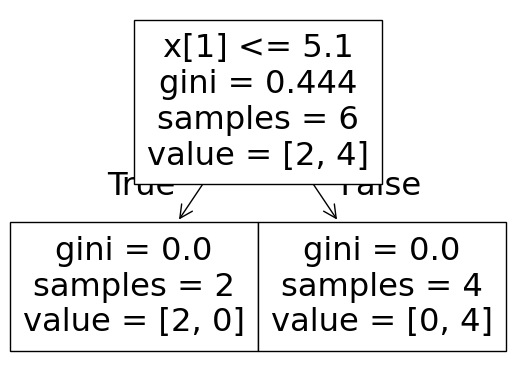

f:\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0


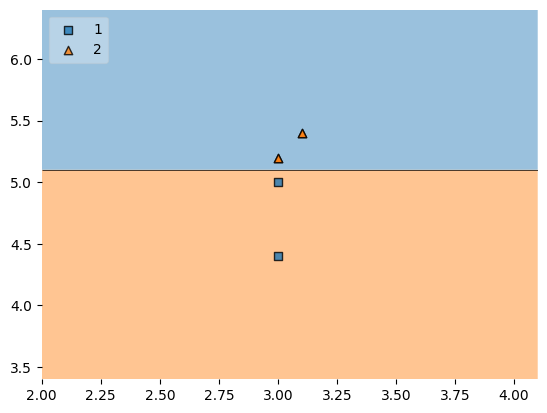

In [68]:
evaluate(dt_bag1, X_train, X_test, y_train, y_test)

In [69]:
df_bag = df_train.sample(8, replace=True)

# Fetch X and y
X = df_bag.iloc[:, 0:2]  # Features
y = df_bag.iloc[:, -1]   # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


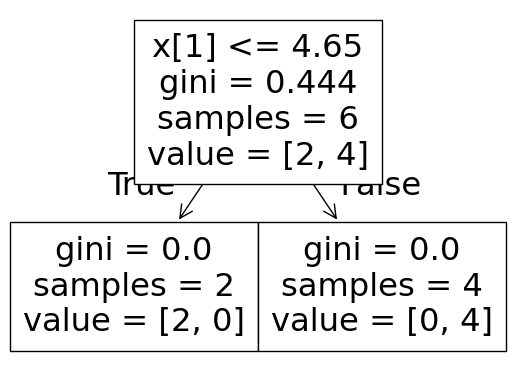

f:\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0


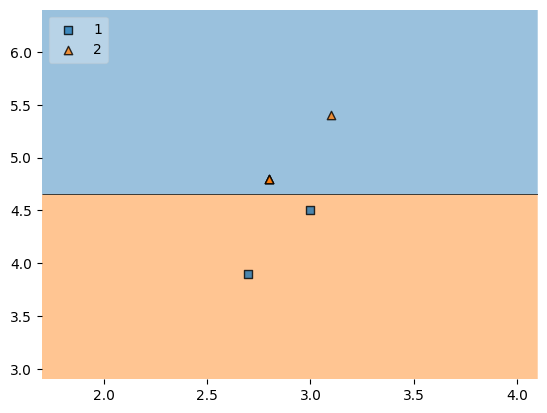

In [70]:
dt_bag2 = DecisionTreeClassifier()

# Call evaluate function with correct parameters
evaluate(dt_bag2, X_train, X_test, y_train, y_test)

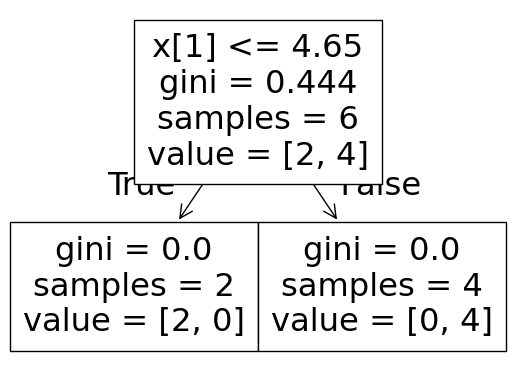

f:\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0


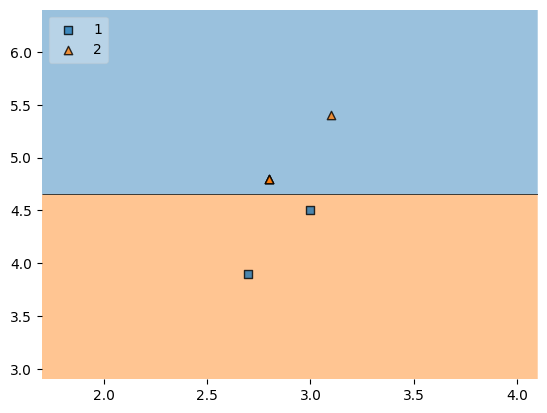

In [71]:
dt_bag3 = DecisionTreeClassifier()

# Call evaluate function with correct parameters
evaluate(dt_bag3, X_train, X_test, y_train, y_test)

# predict

In [72]:
df_test

,sepal width (cm),petal length (cm),Species
73,2.8,4.7,1
112,3.0,5.5,2
80,2.4,3.8,1
89,2.5,4.0,1
83,2.7,5.1,1


In [73]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


f:\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
f:\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
f:\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [74]:
df_train

,sepal width (cm),petal length (cm),Species
75,3.0,4.4,1
59,2.7,3.9,1
142,2.7,5.1,2
145,3.0,5.2,2
139,3.1,5.4,2
77,3.0,5.0,1
95,3.0,4.2,1
82,2.7,3.9,1
126,2.8,4.8,2
66,3.0,4.5,1


In [75]:
df_train.sample(8)

,sepal width (cm),petal length (cm),Species
59,2.7,3.9,1
66,3.0,4.5,1
82,2.7,3.9,1
145,3.0,5.2,2
142,2.7,5.1,2
95,3.0,4.2,1
77,3.0,5.0,1
126,2.8,4.8,2


In [76]:
df1 = df.sample(10)

In [77]:
df1

,sepal width (cm),petal length (cm),Species
110,3.2,5.1,2
123,2.7,4.9,2
136,3.4,5.6,2
120,3.2,5.7,2
66,3.0,4.5,1
128,2.8,5.6,2
131,3.8,6.4,2
90,2.6,4.4,1
111,2.7,5.3,2
121,2.8,4.9,2


In [78]:
df1.sample(2,replace=True,axis=1)

,petal length (cm),Species
110,5.1,2
123,4.9,2
136,5.6,2
120,5.7,2
66,4.5,1
128,5.6,2
131,6.4,2
90,4.4,1
111,5.3,2
121,4.9,2


In [79]:
df1

,sepal width (cm),petal length (cm),Species
110,3.2,5.1,2
123,2.7,4.9,2
136,3.4,5.6,2
120,3.2,5.7,2
66,3.0,4.5,1
128,2.8,5.6,2
131,3.8,6.4,2
90,2.6,4.4,1
111,2.7,5.3,2
121,2.8,4.9,2


In [80]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,petal length (cm)
128,2,5.6
121,2,4.9
66,1,4.5
111,2,5.3
123,2,4.9
111,2,5.3
128,2,5.6
110,2,5.1
